In [1]:
%pip install netCDF4 h5netcdf xarray pandas "numpy<2" matplotlib seaborn packaging scipy store statsmodels plotly nbformat pmdarima


You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Stationarity 

In [3]:
data = pd.read_csv("mp_conc_weekly_full.csv")
data = data.set_index('time').dropna()
data.index = pd.to_datetime(data.index)
data

,mp_concentration
time,
2018-08-19,14.865665
2018-08-26,14.803406
2018-09-02,14.709439
2018-09-09,14.761217
2018-09-16,14.808359
...,...
2025-05-11,14.521454
2025-05-18,14.560788
2025-05-25,14.642275


In [4]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    test_results = adfuller(series)
    print("ADF Statistic: ", test_results[0])
    print("p-value: ", test_results[1])
    print("Critical values: ")
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))

adf_test(data['mp_concentration'][:])

ADF Statistic:  -2.7702578684698795
p-value:  0.06264941543608522
Critical values: 
	1%: -3.45
	5%: -2.87
	10%: -2.57


In [5]:
def plot_graph(df: pd.DataFrame, y: str):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[y], marker='o')
    plt.xlabel('Date')
    plt.ylabel('Mean MP Concentration per km²')
    plt.title('Time Series of '+ y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [6]:
from scipy.stats import boxcox

data['mp_conc_boxcox'], lam = boxcox(data['mp_concentration'])
data['mp_conc_diff'] = data['mp_concentration'].diff()
data['mp_conc_log'] = np.log(data['mp_concentration'])
data['mp_conc_logndiff'] = data['mp_conc_log'].diff()
data['mp_conc_newdiff'] = data['mp_conc_boxcox'].diff()
data

,mp_concentration,mp_conc_boxcox,mp_conc_diff,mp_conc_log,mp_conc_logndiff,mp_conc_newdiff
time,,,,,,
2018-08-19,14.865665,0.124086,NaN,2.699054,NaN,NaN
2018-08-26,14.803406,0.124086,-0.062259,2.694857,-0.004197,-1.526626e-12
2018-09-02,14.709439,0.124086,-0.093968,2.688489,-0.006368,-2.417219e-12
2018-09-09,14.761217,0.124086,0.051778,2.692003,0.003514,1.349171e-12
2018-09-16,14.808359,0.124086,0.047142,2.695192,0.003189,1.191616e-12
...,...,...,...,...,...,...
2025-05-11,14.521454,0.124086,0.064265,2.675627,0.004435,1.950481e-12
2025-05-18,14.560788,0.124086,0.039334,2.678332,0.002705,1.155784e-12
2025-05-25,14.642275,0.124086,0.081487,2.683913,0.005581,2.306336e-12


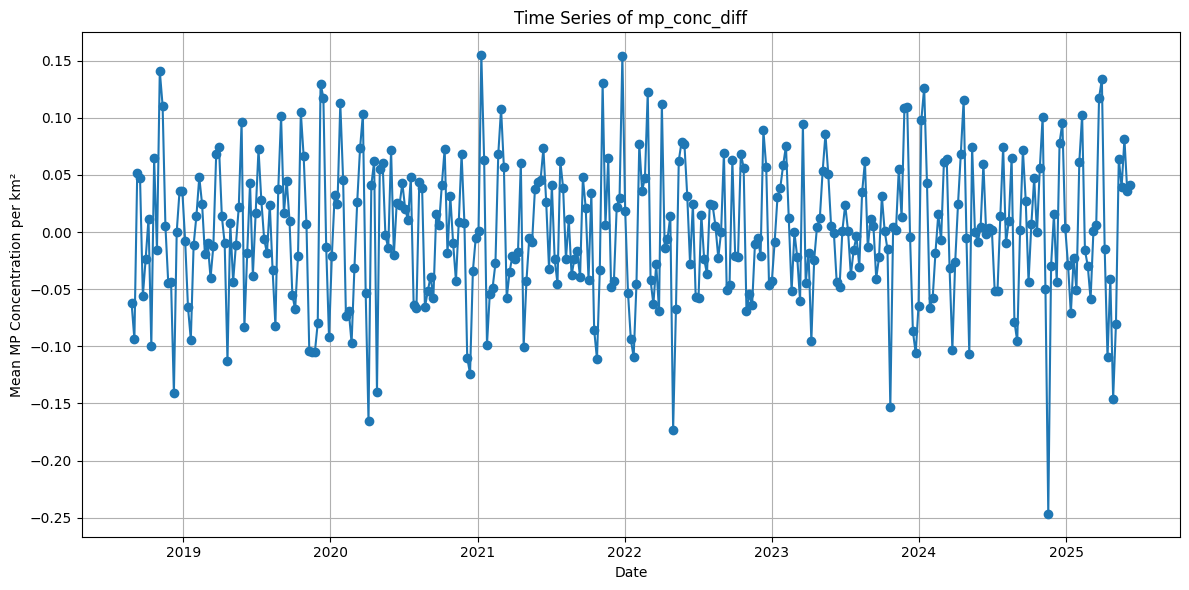

ADF Statistic:  -7.235427836011408
p-value:  1.9452064351259605e-10
Critical values: 
	1%: -3.45
	5%: -2.87
	10%: -2.57


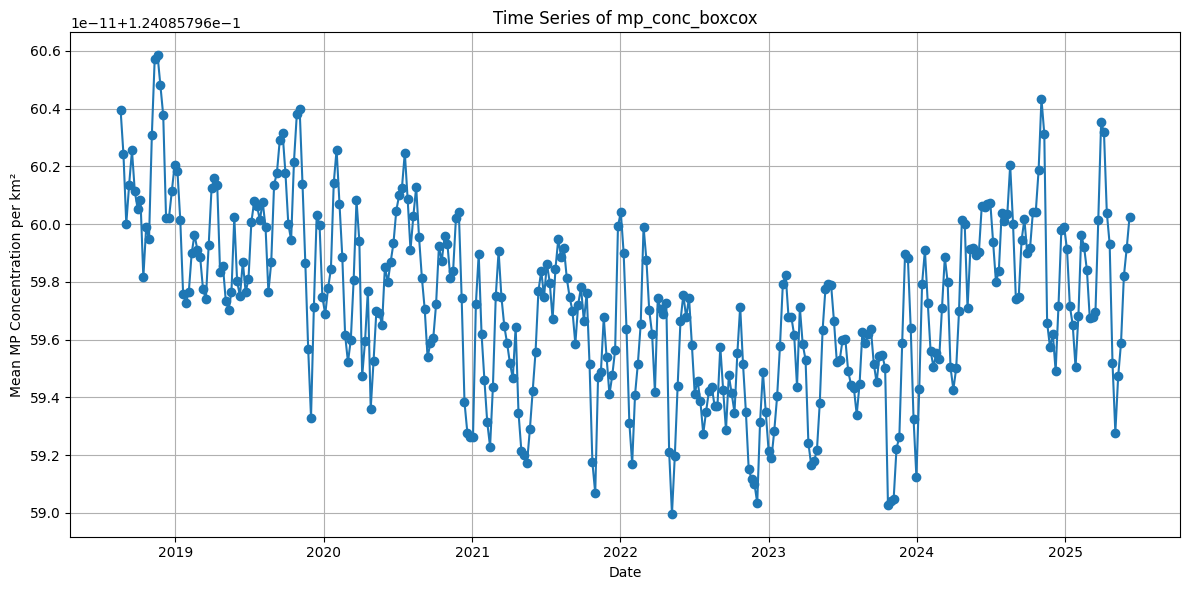

ADF Statistic:  -2.6891539998318534
p-value:  0.07593397895460435
Critical values: 
	1%: -3.45
	5%: -2.87
	10%: -2.57


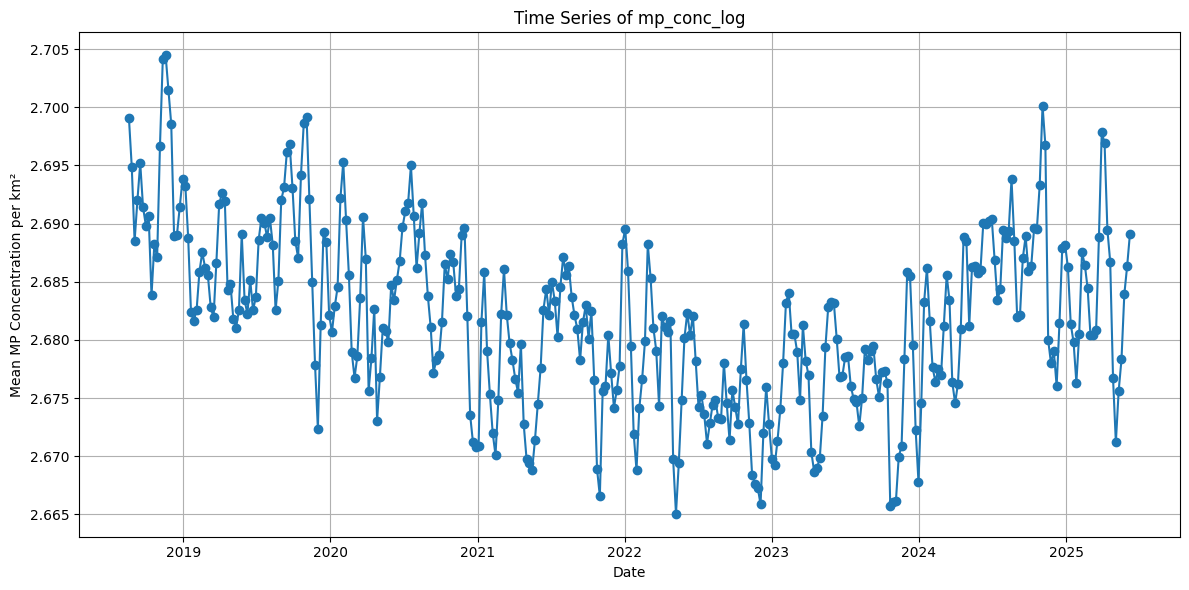

ADF Statistic:  -2.760619199803417
p-value:  0.06412293773659176
Critical values: 
	1%: -3.45
	5%: -2.87
	10%: -2.57


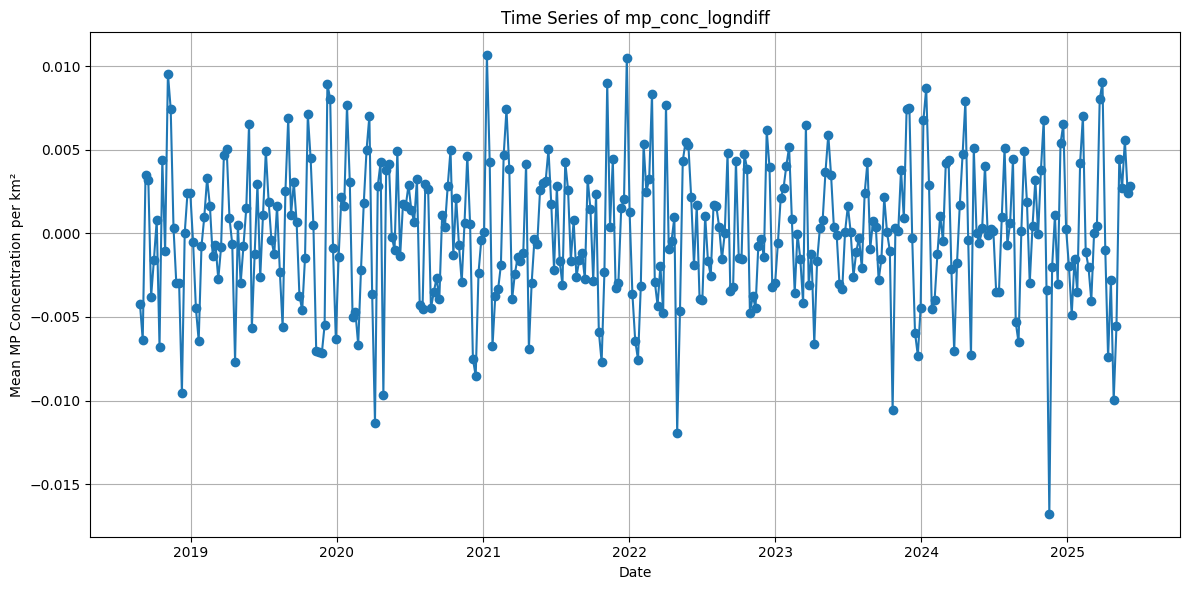

ADF Statistic:  -7.235250484078229
p-value:  1.9471700783829095e-10
Critical values: 
	1%: -3.45
	5%: -2.87
	10%: -2.57


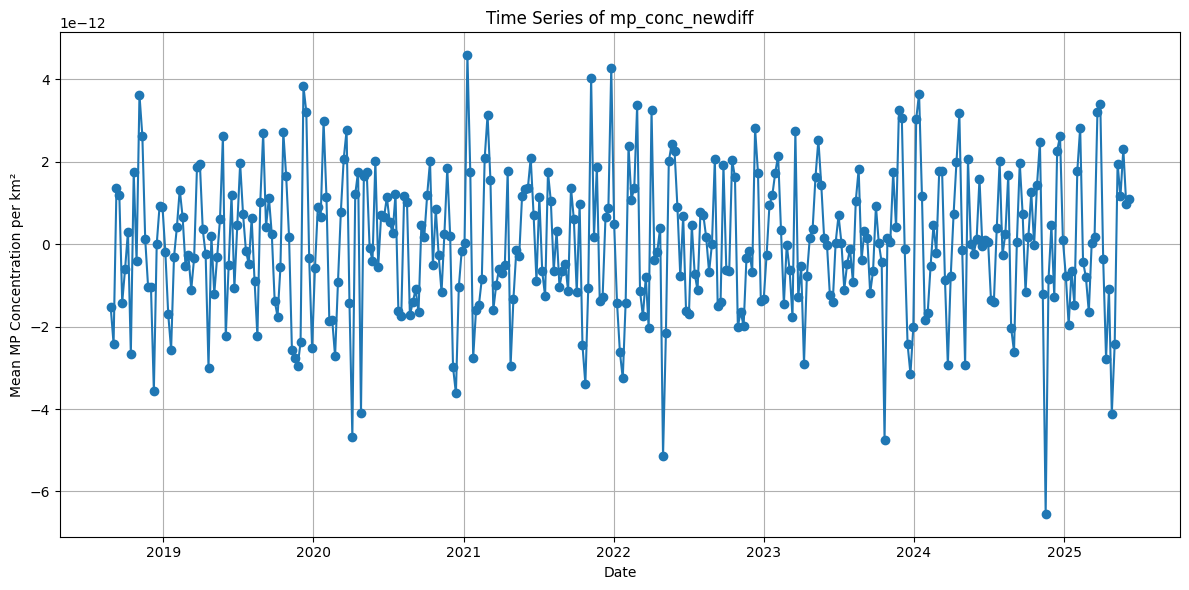

ADF Statistic:  -7.235743452475581
p-value:  1.941716779212283e-10
Critical values: 
	1%: -3.45
	5%: -2.87
	10%: -2.57


In [9]:
plot_graph(data, 'mp_conc_diff')
adf_test(data['mp_conc_diff'][1:])
plot_graph(data, 'mp_conc_boxcox')
adf_test(data['mp_conc_boxcox'][:])
plot_graph(data, 'mp_conc_log')
adf_test(data['mp_conc_log'][:])
plot_graph(data, 'mp_conc_logndiff')
adf_test(data['mp_conc_logndiff'][1:])
plot_graph(data, 'mp_conc_newdiff')
adf_test(data['mp_conc_newdiff'][1:])





The distribution itself is normal enough given the initial ADF test on microplastic data. All we need is to remove seasonality and perhaps assess the necesscity of doing logarithmic transform. 

## ACF & PACF

In [9]:
data = data.dropna()

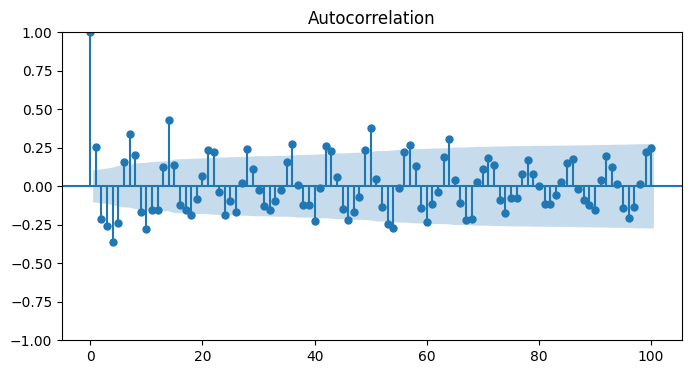

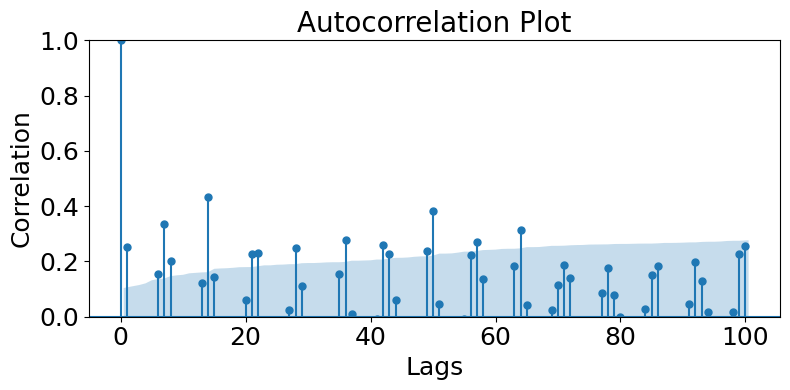

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(8,4))
plot_acf(data['mp_conc_logndiff'].dropna(), lags=100)
plot_acf(data['mp_conc_newdiff'].dropna(), lags=100)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

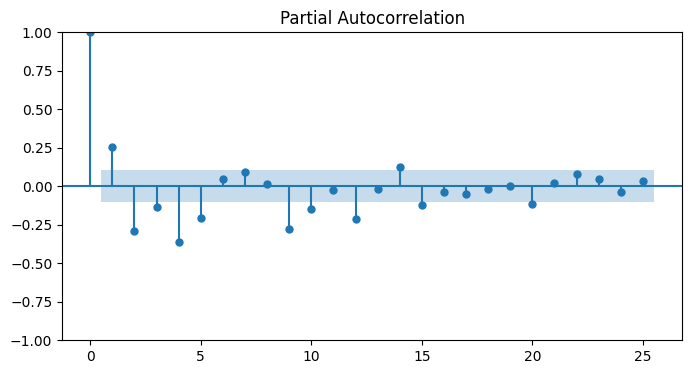

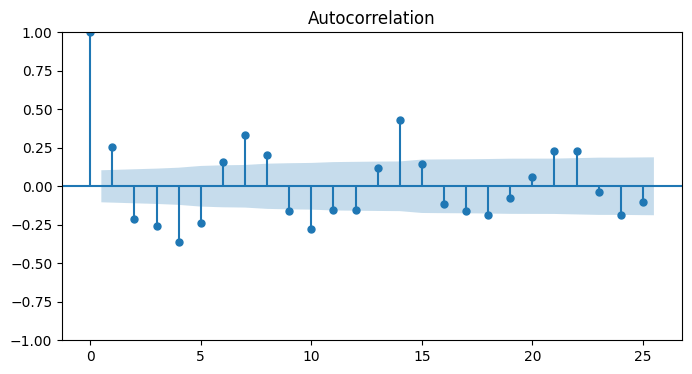

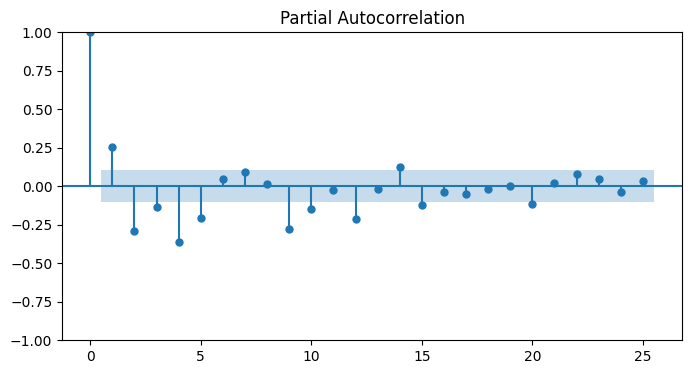

In [19]:
plot_acf(data['mp_conc_newdiff'].dropna(), lags=25)
plot_pacf(data['mp_conc_newdiff'].dropna(), lags=25)

We observe the following: 
- There is a cyclical pattern in the lags every multiple of 1,8,9,13. 
- The blue region signifies the lags that are statistically significant. 

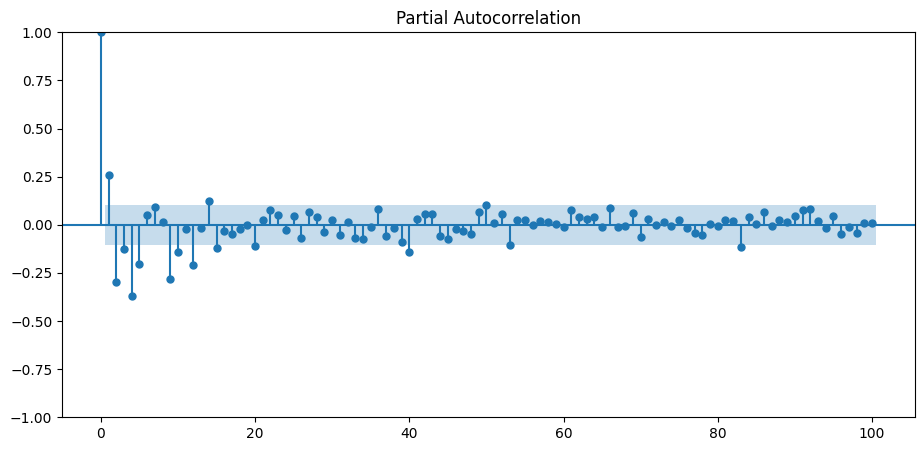

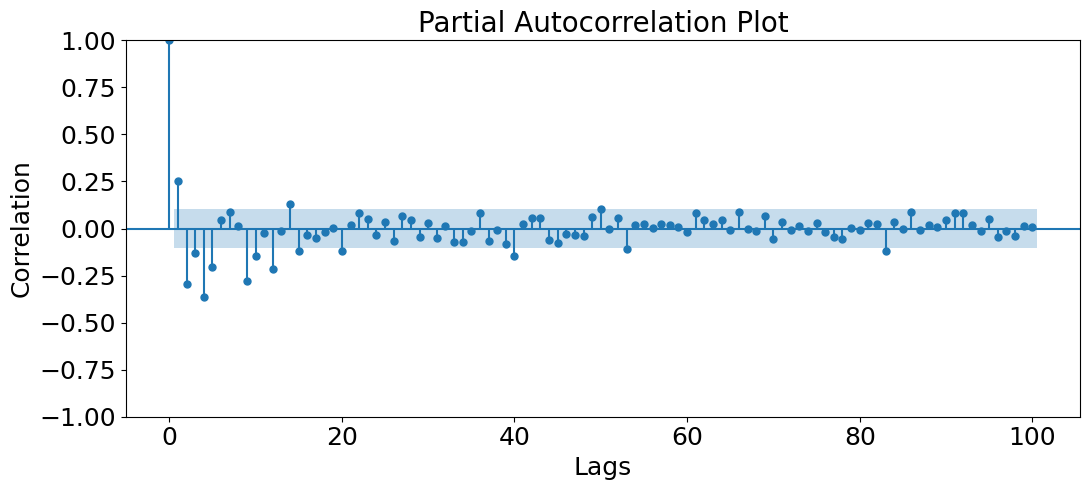

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
# Plot partial autocorrelation
plt.rc("figure", figsize=(11,5))
plot_pacf(data['mp_conc_logndiff'].dropna(), lags=100)
plot_pacf(data['mp_conc_newdiff'].dropna(), lags=100)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

Lag 1 is highly correlated. 
This shows the seasonal effect of about 14 months. 

### Seasonality

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Plot the decomposition for multiplicative series
data.rename(columns={'mp_concentration': 'Multiplicative Decomposition'}, inplace=True)

In [25]:
data

,Multiplicative Decomposition,mp_conc_boxcox,mp_conc_diff,mp_conc_log,mp_conc_logndiff,mp_conc_newdiff
time,,,,,,
2018-08-19,14.865665,0.124086,NaN,2.699054,NaN,NaN
2018-08-26,14.803406,0.124086,-0.062259,2.694857,-0.004197,-1.526626e-12
2018-09-02,14.709439,0.124086,-0.093968,2.688489,-0.006368,-2.417219e-12
2018-09-09,14.761217,0.124086,0.051778,2.692003,0.003514,1.349171e-12
2018-09-16,14.808359,0.124086,0.047142,2.695192,0.003189,1.191616e-12
...,...,...,...,...,...,...
2025-05-11,14.521454,0.124086,0.064265,2.675627,0.004435,1.950481e-12
2025-05-18,14.560788,0.124086,0.039334,2.678332,0.002705,1.155784e-12
2025-05-25,14.642275,0.124086,0.081487,2.683913,0.005581,2.306336e-12


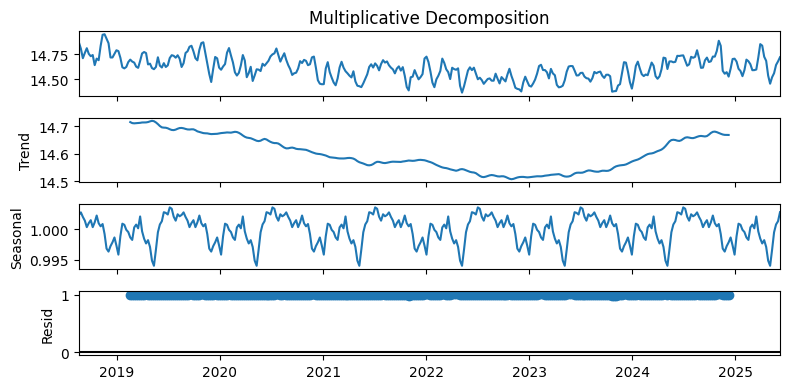

In [26]:
decomposition_plot_multi = seasonal_decompose(data['Multiplicative Decomposition'],
                                              model='multiplicative')
decomposition_plot_multi.plot()
plt.show()

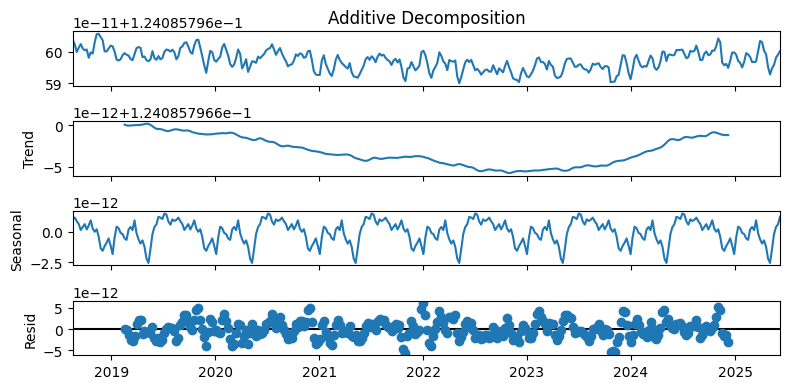

In [27]:
# Apply boxcox to acquire additive model
data['Additive Decomposition'], lam = boxcox(data['Multiplicative Decomposition'])

# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(data['Additive Decomposition'],
                                            model='additive')
decomposition_plot_add.plot()
plt.show()

### Train Test Split

In [29]:
data = pd.read_csv("mp_conc_weekly_full.csv")
data = data.set_index('time').dropna()
data.index = pd.to_datetime(data.index)
data

,mp_concentration
time,
2018-08-19,14.865665
2018-08-26,14.803406
2018-09-02,14.709439
2018-09-09,14.761217
2018-09-16,14.808359
...,...
2025-05-11,14.521454
2025-05-18,14.560788
2025-05-25,14.642275


In [31]:
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]
train, test

(            mp_concentration
 time                        
 2018-08-19         14.865665
 2018-08-26         14.803406
 2018-09-02         14.709439
 2018-09-09         14.761217
 2018-09-16         14.808359
 ...                      ...
 2023-12-31         14.408309
 2024-01-07         14.506263
 2024-01-14         14.632690
 2024-01-21         14.675417
 2024-01-28         14.609019
 
 [285 rows x 1 columns],
             mp_concentration
 time                        
 2024-02-04         14.550875
 2024-02-11         14.532674
 2024-02-18         14.548169
 2024-02-25         14.541131
 2024-03-03         14.602452
 ...                      ...
 2025-05-11         14.521454
 2025-05-18         14.560788
 2025-05-25         14.642275
 2025-06-01         14.677809
 2025-06-08         14.718995
 
 [71 rows x 1 columns])

In [33]:
train['mp_boxcox'], lam = boxcox(train['mp_concentration'])
train

/var/folders/j9/ndmp7tg95qjck81gbd4gdfy00000gn/T/ipykernel_18052/3888136039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mp_boxcox'], lam = boxcox(train['mp_concentration'])


,mp_concentration,mp_boxcox
time,,
2018-08-19,14.865665,0.076671
2018-08-26,14.803406,0.076671
2018-09-02,14.709439,0.076671
2018-09-09,14.761217,0.076671
2018-09-16,14.808359,0.076671
...,...,...
2023-12-31,14.408309,0.076671
2024-01-07,14.506263,0.076671
2024-01-14,14.632690,0.076671


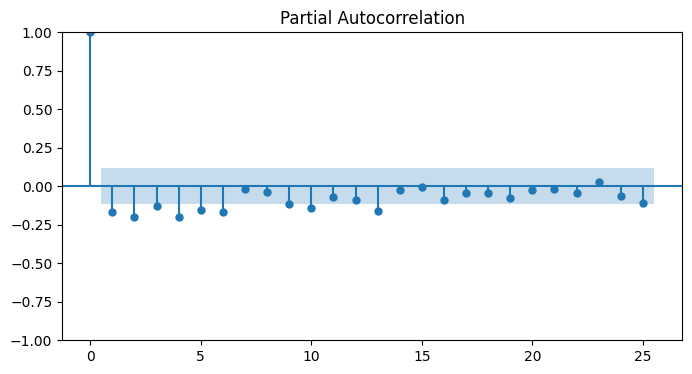

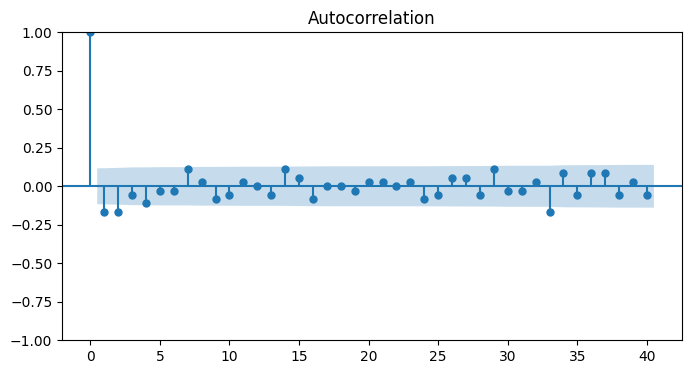

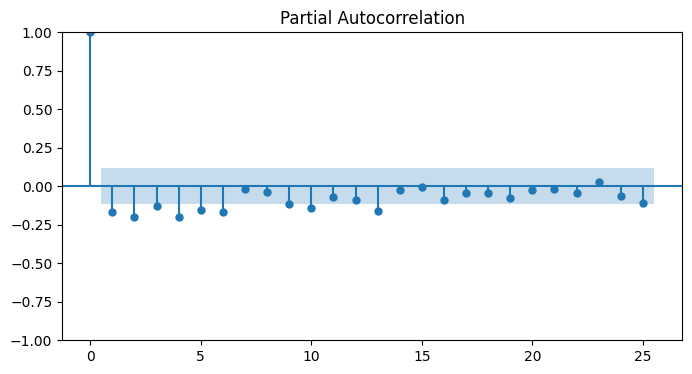

In [38]:
plot_acf(train['mp_boxcox'].diff().dropna(), lags=40)
plot_pacf(train['mp_boxcox'].diff().dropna(), lags=25)